# Breast Cancer Dataset
## Binary Classification Prediction for type of Breast Cancer

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.
</br>

Acknowledgements:
This dataset has been referred from Kaggle.

# Exploration

In [39]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [40]:
data =pd.read_csv("breast-cancer.csv")

In [41]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.shape

(569, 32)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The info for this dataset is showing us that aside from the ID and diagnosis all other columns are float types.

In [7]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We can see that there are no missing values for the entire dataset!

In [8]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# Malignant or Benign
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# SVM

In [42]:
# for our feature selection x will be all featrures aside from id and diagnosis
X = data.drop(['id', 'diagnosis'], axis=1)

# our target variable will be diagnosis
y = data['diagnosis']

In [43]:
# now encode the labels for diagnois to be binary 'B' will be 0 and 'M' will be 1
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 'B' -> 0, 'M' -> 1

In [44]:
# train, test, split the data to 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## SVM with rbf

In [46]:
# initializing the SVM
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)


SVC(random_state=42)

In [47]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

In [48]:
# performance evaluations
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.98
Confusion Matrix:
[[71  0]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## SVM with linear

In [49]:
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [50]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

In [51]:
# performance evaluations
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.96
Confusion Matrix:
[[68  3]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## SVM with polynomial

In [52]:
svm_classifier = SVC(kernel='poly', degree=3, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [53]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

In [54]:
# performance evaluations
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.87
Confusion Matrix:
[[71  0]
 [15 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90        71
           1       1.00      0.65      0.79        43

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114



These scores are so high, so i assume there is some overfitting going on! I will now test the dataset with k folds validation.

# K Folds

In [55]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define models for each kernel
models = {
    "RBF Kernel": SVC(kernel='rbf', random_state=42),
    "Linear Kernel": SVC(kernel='linear', random_state=42),
    "Polynomial Kernel": SVC(kernel='poly', degree=3, random_state=42)
}

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model using cross-validation
for name, model in models.items():
    print(f"\n{name} Cross-Validation Results:")
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"Fold Accuracies: {cv_scores}")
    print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
    print(f"Standard Deviation: {np.std(cv_scores):.2f}")



RBF Kernel Cross-Validation Results:
Fold Accuracies: [0.93859649 0.87719298 0.89473684 0.93859649 0.92035398]
Mean Accuracy: 0.91
Standard Deviation: 0.02

Linear Kernel Cross-Validation Results:
Fold Accuracies: [0.94736842 0.92982456 0.95614035 0.93859649 0.96460177]
Mean Accuracy: 0.95
Standard Deviation: 0.01

Polynomial Kernel Cross-Validation Results:
Fold Accuracies: [0.92982456 0.87719298 0.88596491 0.93859649 0.91150442]
Mean Accuracy: 0.91
Standard Deviation: 0.02


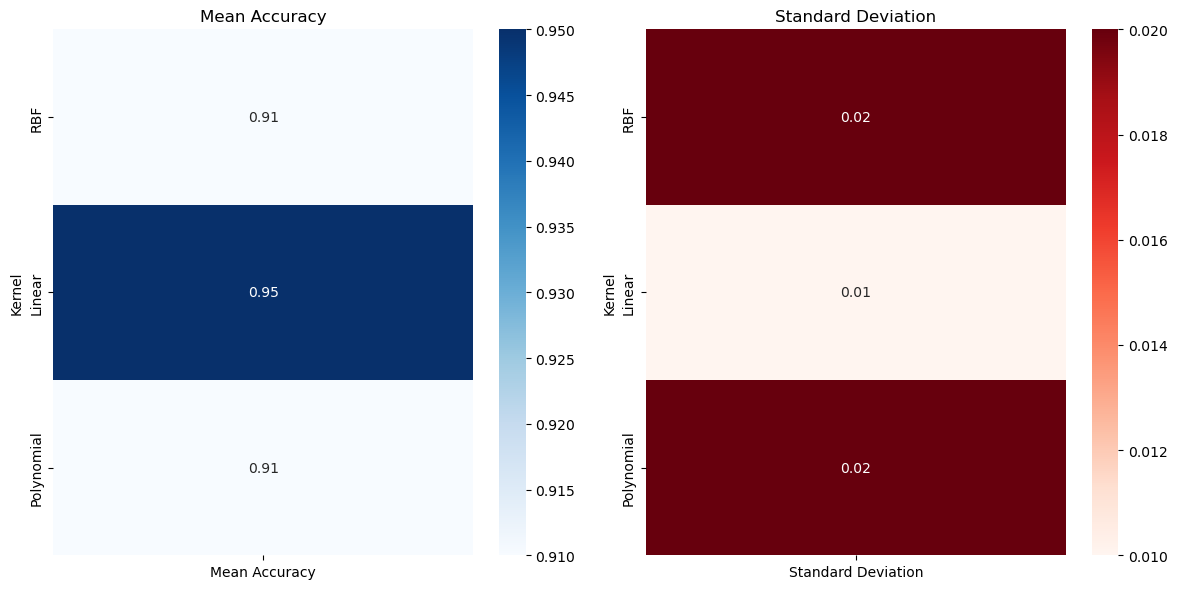

In [56]:
# Visualising the results
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example cross-validation results
results_data = {
    "Kernel": ["RBF", "Linear", "Polynomial"],
    "Mean Accuracy": [0.91, 0.95, 0.91],
    "Standard Deviation": [0.02, 0.01, 0.02]
}

# Create a DataFrame to store all of the values above
cv_results_df = pd.DataFrame(results_data)

# Set 'Kernel' as the index for labeling
cv_results_df.set_index("Kernel", inplace=True)

# Create a heatmap for Mean Accuracy and Standard Deviation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Heatmap for Mean Accuracy
sns.heatmap(cv_results_df[["Mean Accuracy"]], annot=True, cmap="Blues", fmt=".2f", cbar=True, ax=ax[0])
ax[0].set_title("Mean Accuracy")

# Heatmap for Standard Deviation
sns.heatmap(cv_results_df[["Standard Deviation"]], annot=True, cmap="Reds", fmt=".2f", cbar=True, ax=ax[1])
ax[1].set_title("Standard Deviation")

plt.tight_layout()
plt.show()


The Linear Kernel SVM provided the highest accuracy and F1-score, indicating that the data might be linearly separable.
The RBF Kernel also performed well but had slightly lower accuracy, suggesting that non-linear relationships in the data are minimal.
The Polynomial Kernel showed signs of overfitting, as the accuracy dropped significantly compared to the other kernels.

Cross-validation confirmed the robustness of the Linear Kernel SVM, with low variance across folds.

Early detection of breast cancer using machine learning models like SVM is feasible and yields high accuracy.
Further improvements can focus on handling class imbalance and testing other algorithms for comparison.

---
Compare SVM with other algorithms such as Random Forests, Gradient Boosting (XGBoost/LightGBM), or Deep Learning Models to validate the performance of SVM
Test the models on external or real-world datasets to evaluate generalizability.
Introduce noise or missing values into the dataset to simulate real-world scenarios and observe model performance.